In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [2]:
from IPython.core.debugger import set_trace

In [3]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [4]:
data_frame=pd.read_csv("000001.csv")

In [5]:
data_frame.shape

(242, 7)

In [6]:
data_frame.head()

,Date,Open,High,Low,Close,Turnover,Volume
0,1/5/2015,3258.63,3369.28,3253.88,3350.52,549760.13,53135238400
1,1/6/2015,3330.80,3394.22,3303.18,3351.45,532398.46,50166169600
2,1/7/2015,3326.65,3374.90,3312.21,3373.95,436416.70,39191888000
3,1/8/2015,3371.96,3381.57,3285.10,3293.46,399230.30,37113116800
4,1/9/2015,3276.97,3404.83,3267.51,3285.41,458648.00,41024086400


In [7]:
data_frame["Low"] = (data_frame["Low"]-data_frame["Low"].min()) / (data_frame["Low"].max()-data_frame["Low"].min())
data_frame["Turnover"] = (data_frame["Turnover"]-data_frame["Turnover"].min()) / (data_frame["Turnover"].max()-data_frame["Turnover"].min())

In [8]:
data_frame.head()

,Date,Open,High,Low,Close,Turnover,Volume
0,1/5/2015,3258.63,3369.28,0.178973,3350.52,0.370114,53135238400
1,1/6/2015,3330.80,3394.22,0.200858,3351.45,0.355727,50166169600
2,1/7/2015,3326.65,3374.90,0.204866,3373.95,0.276195,39191888000
3,1/8/2015,3371.96,3381.57,0.192832,3293.46,0.245382,37113116800
4,1/9/2015,3276.97,3404.83,0.185023,3285.41,0.294616,41024086400


In [9]:
theta_0 = np.linspace(-2,2,50)
theta_1 = np.linspace(-3,3,50)

X, Y = np.meshgrid(theta_0,theta_1)
MSE = np.zeros((50,50))
number_dataset = len(data_frame["Low"])

for i in range(50):
    for k in range(50):
        h = [X[i,k]+Y[i,k]*data for data in data_frame["Low"]]
        J = np.sum((h-data_frame["Turnover"])**2)/(2*number_dataset)
        MSE[i,k]=J

In [10]:
min_index = np.argwhere(MSE == np.min(MSE))

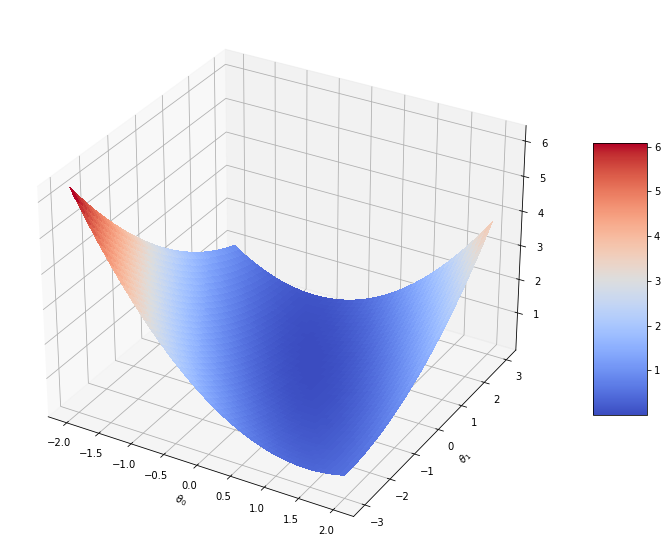

In [11]:
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,MSE,cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

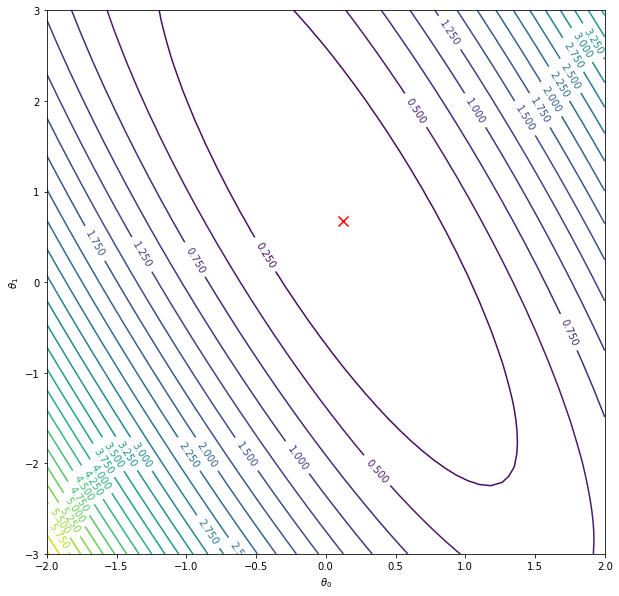

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
CS = ax.contour(X, Y, MSE,25)
ax.scatter(theta_0[min_index[0][1]],theta_1[min_index[0][0]],c='r',marker='x',s=100)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.clabel(CS,fontsize=10)
plt.show()

In [26]:
theta_1 = np.linspace(-5,5,50)
MSE=[]
for i in range(50):
    # hypothesis for each x value
    h = theta_1[i]*data_frame["Low"]
    J = np.sum((h-data_frame["Turnover"])**2)/(2*number_dataset)
    MSE.append(J)

In [28]:
min_index = np.argwhere(MSE == np.min(MSE))
h=theta_1[min_index[0]]*data_frame["Low"]

Text(0, 0.5, 'Turnover')

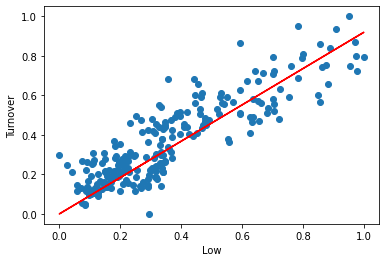

In [29]:
fig, ax = plt.subplots()
plt.scatter(data_frame["Low"],data_frame["Turnover"])
plt.plot(data_frame["Low"],h,color='r')
ax.set_xlabel("Low")
ax.set_ylabel("Turnover")

### Gradient descent
- start with $\theta_0$ = 0 and $\theta_1$ = 0
- assignment $a:=b$ | truth assertion $a=b$
    - simultaneouly update the $\theta_0$ and $\theta_1$

In [42]:
# one varaible case of gradient descent
x = np.linspace(-7,5,50)
J = 2*x**2+3*x+4

Text(0, 0.5, 'Cost function')

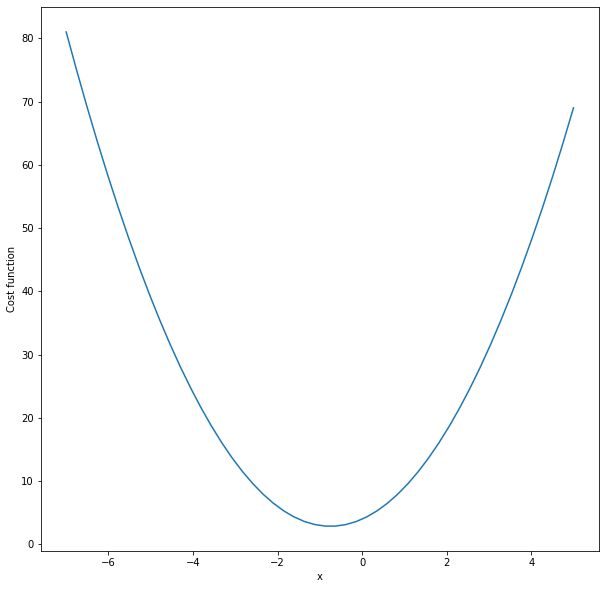

In [46]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(x,J)
ax.set_xlabel('x')
ax.set_ylabel('Cost function')

In [52]:
# learning rate
alpha = 0.1
# first derivative of the cost function
J_prime = 4*x + 3
# initial case of x
x_ini = 3.5
solution = 2*x_ini**2+3*x_ini+4
while solution != 32/9:
    x_next = x_ini - 4*x_ini - 3
    solution = 2*x_next**2+3*x_next+4
    x_ini = x_next

ax.scatter(x_next,solution)

OverflowError: (34, 'Result too large')